<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Hashing" data-toc-modified-id="Hashing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hashing</a></span></li><li><span><a href="#Hash-table" data-toc-modified-id="Hash-table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hash table</a></span></li><li><span><a href="#References" data-toc-modified-id="References-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Hashing

</font>
</div>

# Hashing
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- Hashing is a technique or process of mapping keys, and values into the hash table by using a hash function.
- It is done for faster access to elements. The efficiency of mapping depends on the efficiency of the hash function used.
- Hashing refers to the process of generating a fixed-size output from an input of variable size using the mathematical formulas known as hash functions. This technique determines an index or location for the storage of an item in a data structure.
    
</font>
</div>

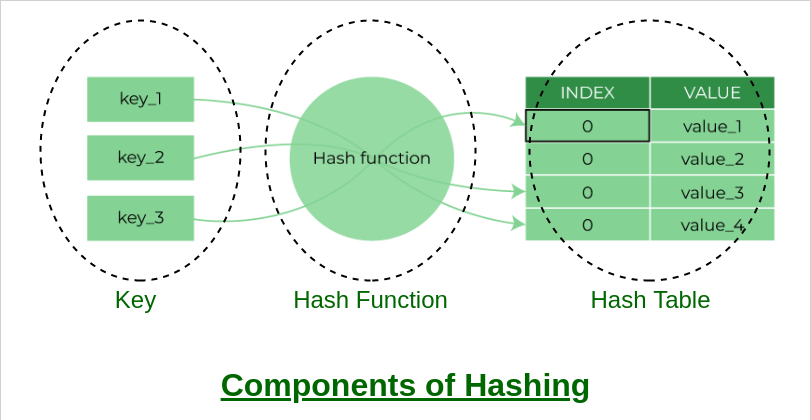

# Hash table
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- Hash table are also known as python dictionary.
- **Hashing vs. dictionary** A dictionary is a general concept that maps unique keys to non-unique values. But the Hash is a data structure that maps unique keys to values by taking the hash value of the key and mapping it to a bucket where one or more values are stored.

</font>
</div>

In [3]:
class HashTable:
    """
    a.k.a python's dictionary
    the initial size of the table has been chosen to be 11, 
    although this number is arbitrary, it's important
    for it to be a prime number so that collision resolution 
    will be efficient; this implementation does not handle
    resizing the hashtable when it runs out of the original size
    """

    def __init__(self):
        # slot will hold the key and data will hold the value
        self.size = 11
        self.slot = [None] * self.size
        self.data = [None] * self.size

    def _put(self, key, value):
        hash_value = self._hash(key)
        if self.slot[hash_value] == None:
            self.slot[hash_value] = key
            self.data[hash_value] = value
        elif self.slot[hash_value] == key:
            # replace the original key value
            self.data[hash_value] = value
        else:
            # rehash to get the next location possible
            # if a collision is to occurr
            next_slot = self._rehash(hash_value)
            slot_value = self.slot[next_slot]
            while slot_value != None and slot_value != key:
                next_slot = self._rehash(next_slot)
                slot_value = self.slot[next_slot]

            if self.slot[next_slot] == None:
                self.slot[next_slot] = key
                self.data[next_slot] = value
            else:
                self.data[next_slot] = value

    def _get(self, key):
        data = None
        stop = False
        found = False
        start_slot = self._hash(key)
        next_slot = start_slot
        while self.slot[next_slot] != None and not found and not stop:
            if self.slot[next_slot] == key:
                data = self.data[next_slot]
                found = True
            else:
                # if we rehash to the starting value
                # then it means the data is not here
                next_slot = self._rehash(next_slot)
                if next_slot == start_slot:
                    stop = True
        return data

    def _hash(self, key):
        return key % self.size

    def _rehash(self, oldhash):
        """
        a simple plus 1 rehash, where we add 1 to
        the original value and hash it again to 
        see if the slot it empty (None)
        """
        return (oldhash + 1) % self.size

    def __getitem__(self, key):
        # allow access using``[]`` syntax
        return self._get(key)

    def __setitem__(self, key, value):
        self._put(key, value)

In [4]:
H = HashTable()
H[54] = 'cat'
H[26] = 'dog'
H[93] = 'lion'
H[17] = 'tiger'
H[77] = 'bird'
H[44] = 'goat'
H[55] = 'pig'
print(H.slot)
print(H.data)

[77, 44, 55, None, 26, 93, 17, None, None, None, 54]
['bird', 'goat', 'pig', None, 'dog', 'lion', 'tiger', None, None, None, 'cat']


In [5]:
print(H[55])
print(H[20])

pig
None


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- [Problem Solving with Algorithms and Data Structures](http://interactivepython.org/runestone/static/pythonds/index.html). 
- https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html
- [Hashing vs. dictionary](https://mixandgo.com/learn/ruby/hash-vs-dictionary)
- [Introduction to Hashing – Data Structure and Algorithm Tutorials](https://www.geeksforgeeks.org/introduction-to-hashing-data-structure-and-algorithm-tutorials/)

</font>
</div>